In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("state_level_latest.csv")

In [12]:
df.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2025409,1377384,41638,605933,06/08/2020 23:46:37,454,TT,0,0,0,NaN
1,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
4,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN


In [14]:
df.tail()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
33,Sikkim,829,353,1,475,06/08/2020 23:01:46,0,SK,0,0,0,NaN
34,Mizoram,538,288,0,249,06/08/2020 17:29:49,1,MZ,0,0,0,"""Other"" case in MZ is a patient who 'migrated-..."
35,Andaman and Nicobar Islands,1123,355,16,752,06/08/2020 20:45:08,0,AN,0,0,0,NaN
36,State Unassigned,0,0,0,0,19/07/2020 09:40:01,0,UN,0,0,0,MoHFW website reports that these are the 'case...
37,Lakshadweep,0,0,0,0,26/03/2020 07:19:29,0,LD,0,0,0,NaN


In [32]:
print("Total row and column:", df.shape)
print("Total row:",df.shape[0])
print("Total column:",df.shape[1])

Total row and column: (38, 12)
Total row: 38
Total column: 12


In [38]:
print(df.isnull().sum())

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
Migrated_Other        0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          23
dtype: int64


In [40]:
print(df.info)

<bound method DataFrame.info of                                        State  Confirmed  Recovered  Deaths  \
0                                      Total    2025409    1377384   41638   
1                                Maharashtra     479779     316375   16792   
2                                 Tamil Nadu     279144     221087    4571   
3                                      Delhi     141531     127124    4059   
4                                  Karnataka     158254      80281    2897   
5                             Andhra Pradesh     196789     112870    1753   
6                              Uttar Pradesh     108974      63402    1918   
7                                    Gujarat      67811      50524    2579   
8                                West Bengal      86754      61023    1902   
9                                  Telangana      73050      52103     589   
10                                 Rajasthan      48996      35131     757   
11                              

In [45]:
## EDA ............................................................

In [49]:
#top 10 state with most confirmed state 

In [82]:
df=df[df['State'] != 'Total']
top_confirmed_state=df.sort_values(by="Confirmed",ascending=False)[["State","Confirmed"]].head(10)
print("These are states with most confirmed cases:",top_confirmed_state)

These are states with most confirmed cases:              State  Confirmed
1      Maharashtra     479779
2       Tamil Nadu     279144
5   Andhra Pradesh     196789
4        Karnataka     158254
3            Delhi     141531
6    Uttar Pradesh     108974
8      West Bengal      86754
9        Telangana      73050
11           Bihar      68148
7          Gujarat      67811


Text(0.5, 1.0, 'Top 10 State with Most Confirmed State ')

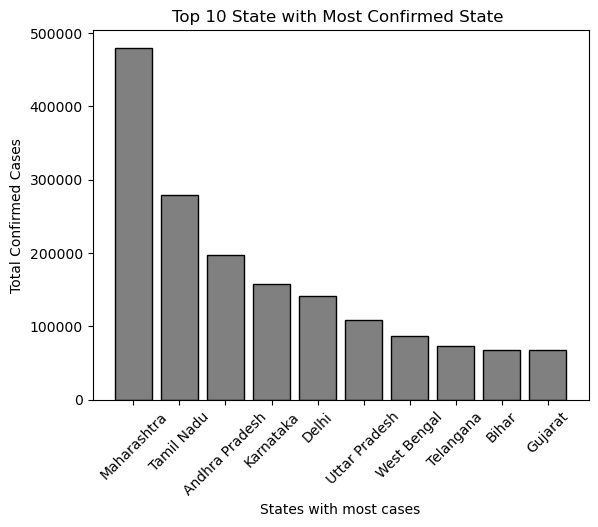

In [100]:
plt.bar(top_confirmed_state["State"],top_confirmed_state["Confirmed"],color="grey",edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("States with most cases")
plt.ylabel("Total Confirmed Cases")
plt.title("Top 10 State with Most Confirmed State ")

In [103]:
#Top 10 State with Most Death case 

In [112]:
most_death = df.sort_values("Deaths",ascending=False)[["State","Deaths"]].iloc[0:5]
print(most_death)

         State  Deaths
1  Maharashtra   16792
2   Tamil Nadu    4571
3        Delhi    4059
4    Karnataka    2897
7      Gujarat    2579


Text(0.5, 1.0, 'State with more death by COVID')

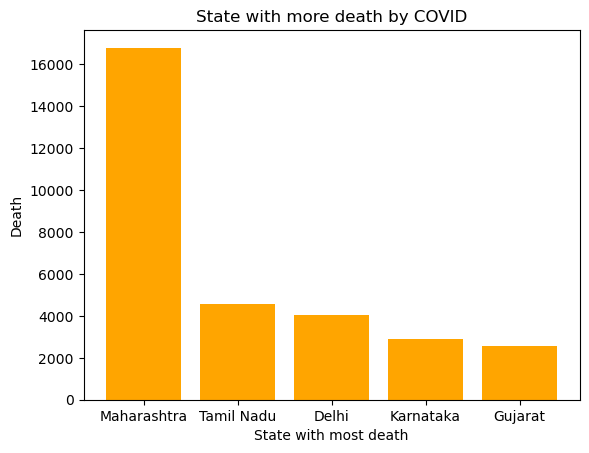

In [133]:
plt.bar(most_death["State"],most_death["Deaths"],color="orange")
plt.xlabel("State with most death")
plt.ylabel("Death")
plt.title("State with more death by COVID")

In [122]:
#Highest recovered state...

In [129]:
top_recovered = df.sort_values("Recovered",ascending=False)[["State","Recovered"]].iloc[0:5]
print(top_recovered)

            State  Recovered
1     Maharashtra     316375
2      Tamil Nadu     221087
3           Delhi     127124
5  Andhra Pradesh     112870
4       Karnataka      80281


Text(0.5, 1.0, 'State with more numer of Recoveries by COVID')

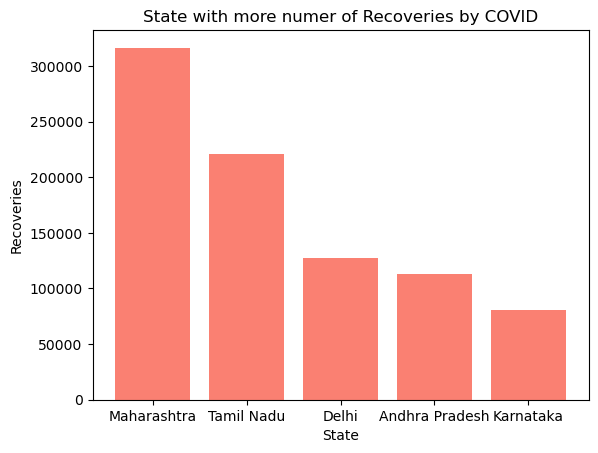

In [135]:
plt.bar(top_recovered["State"],top_recovered["Recovered"],color="salmon")
plt.xlabel("State")
plt.ylabel("Recoveries")
plt.title("State with more numer of Recoveries by COVID")

In [138]:
#Pie chart of Case distribution

In [140]:
#count the total number of eash cases

In [148]:
Confirmed = df["Confirmed"].sum()
Recovered = df["Recovered"].sum()
Active = df["Active"].sum()
Death = df["Deaths"].sum()
print("Total Recovered case:",Recovered)
print("Total Confirmed case:",Confirmed)
print("Total Active case:",Active)
print("Total Death case:",Death)

Total Recovered case: 1377384
Total Confirmed case: 2025409
Total Active case: 605933
Total Death case: 41638


Text(0.5, 1.0, 'Overall Covid Case Distribution')

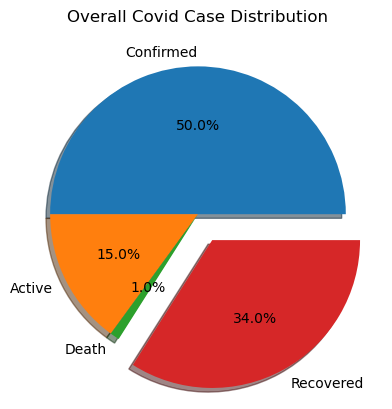

In [176]:
plt.pie(
    [Confirmed,Active,Death,Recovered],
    labels = ["Confirmed","Active","Death","Recovered"],
    autopct = '%1.1f%%',
    explode = [0,0,0,0.2],
    shadow = True
)
plt.title("Overall Covid Case Distribution")

In [168]:
#Active vs recovered vs confirmed

In [201]:
top_state = df.sort_values("Confirmed",ascending=False)[["State","Confirmed","Recovered","Deaths","Active"]].iloc[0:5]
print(top_state)

            State  Confirmed  Recovered  Deaths  Active
1     Maharashtra     479779     316375   16792  146305
2      Tamil Nadu     279144     221087    4571   53486
5  Andhra Pradesh     196789     112870    1753   82166
4       Karnataka     158254      80281    2897   75067
3           Delhi     141531     127124    4059   10348


In [203]:
states=top_state["State"]
active = top_state["Active"]
confirmed=top_state["Confirmed"]
recovered=top_state["Recovered"]

In [205]:
x=np.arange(len(states))
width = 0.25

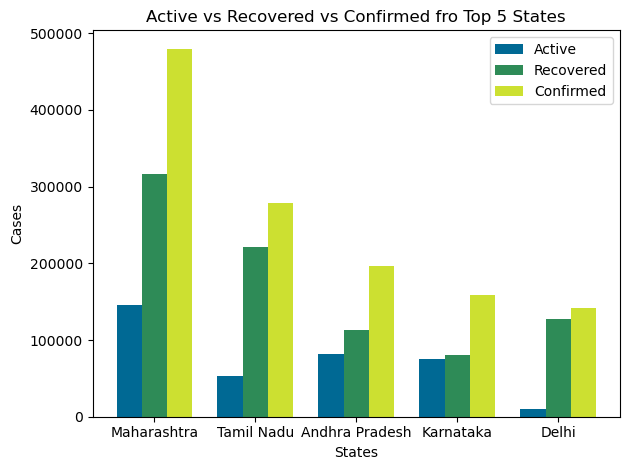

In [211]:
plt.bar(x-width,active,width=width,color = "#006994",label="Active")
plt.bar(x,recovered,width=width,color = "seagreen",label="Recovered")
plt.bar(x+width,confirmed,width=width,color = "#cce031",label="Confirmed")
plt.xlabel("States")
plt.ylabel("Cases")
plt.title("Active vs Recovered vs Confirmed fro Top 5 States")
plt.legend()
plt.xticks(x,states)
plt.tight_layout()